In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, losses

In [2]:
def encode_layer(input_layer, filter_size):
    conv = layers.Conv2D(filter_size, (3, 3), activation='relu', padding='same')(input_layer)
    conv = layers.Conv2D(filter_size, (3, 3), activation='relu', padding='same')(conv)
    p1 = layers.MaxPool2D((2, 2))(conv)
    return p1, conv

def decode_layer(input_layer, shared, filter_size):
    up = layers.Conv2DTranspose(filter_size, (3, 3), strides=(2, 2), padding='same')(input_layer)
    conv = layers.concatenate([up, shared])
    conv = layers.Conv2D(filter_size // 2, (3, 3), activation='relu', padding='same')(conv)
    conv = layers.Conv2D(filter_size // 2, (3, 3), activation='relu', padding='same')(conv)
    return conv

In [3]:
def build_model():
    inputs = layers.Input(shape=(2048,))
    reshaped = layers.Reshape(target_shape=(64, 32, 1))(inputs)

    # Encoder
    l1, c1 = encode_layer(reshaped, 64)
    l2, c2 = encode_layer(l1, 128)
    l3, c3 = encode_layer(l2, 256)
    l4, c4 = encode_layer(l3, 512)

    conv = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(l4)
    conv = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(conv)

    l5 = decode_layer(conv, c4, 1024)
    l6 = decode_layer(l5, c3, 512)
    l7 = decode_layer(l6, c2, 256)
    l8 = decode_layer(l7, c1, 128)

    out1 = layers.Conv2DTranspose(2 , (3, 3), strides=(2, 2), padding='same')(l8)
    flattened = layers.Flatten()(out1)
    output = layers.Dense(units=2048, activation='linear')(flattened)

    model = models.Model(inputs, output)
    return model

In [4]:
model2 = build_model()
model2.compile(optimizer='adam', loss=losses.mae, metrics=['accuracy'])

2024-06-19 22:37:59.501862: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-19 22:37:59.501881: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-19 22:37:59.501885: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-19 22:37:59.502037: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-19 22:37:59.502047: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 64, 32, 1) │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 64, 32,    │        640 │ reshape[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 32,    │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 32, 16,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 16,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 16,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 8,     │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 8,     │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 8,     │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 4, 256) │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 8, 4, 512) │  1,180,160 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 8, 4, 512) │  2,359,808 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 4, 2, 512) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 4, 2,      │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 4, 2,      │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 8, 4,      │  9,438,208 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8, 4,      │          0 │ conv2d_transpose

 Total params: 77,471,042 (295.53 MB)

 Trainable params: 77,471,042 (295.53 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
class ReshapeLayer(layers.Layer):
    def __init__(self, target_shape):
        super(ReshapeLayer, self).__init__()
        self.target_shape = target_shape

    def call(self, inputs):
        reshaped = tf.reshape(inputs, (-1,) + self.target_shape)
        return reshaped

In [7]:
model = models.Sequential([
    layers.Input(shape=(2048,)),
    layers.Reshape(target_shape=(64, 32, 1)),
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1024, activation='relu'),
    layers.Dense(units=2048, activation='sigmoid'),
])

In [8]:
model.compile(optimizer='adam', loss=losses.mse, metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 64, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 62, 30, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 60, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 58, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 56, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 172032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    88,080,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2048)           │     2,099,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,802,560 (346.38 MB)

 Trainable params: 90,802,560 (346.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-06-19 22:38:04.019400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 450ms/step - accuracy: 0.0011 - loss: 0.3238 - val_accuracy: 0.0000e+00 - val_loss: 0.1378
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 463ms/step - accuracy: 0.0119 - loss: 0.1173 - val_accuracy: 0.0000e+00 - val_loss: 0.1065
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 448ms/step - accuracy: 0.0019 - loss: 0.1076 - val_accuracy: 0.0167 - val_loss: 0.1064
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 412ms/step - accuracy: 0.0080 - loss: 0.1047 - val_accuracy: 0.0000e+00 - val_loss: 0.1028
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step - accuracy: 0.0088 - loss: 0.1083 - val_accuracy: 0.0000e+00 - val_loss: 0.0998
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.0074 - loss: 0.0967 - val_accuracy: 0.0167 - val_loss: 0.0993
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 404ms/step - accuracy: 0.0130 - loss: 0.0923 - val_accuracy: 0.0000e+00 - val_loss: 0.1016
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 446ms/step - accuracy: 0.0098 - loss: 0.0891 - val_ac

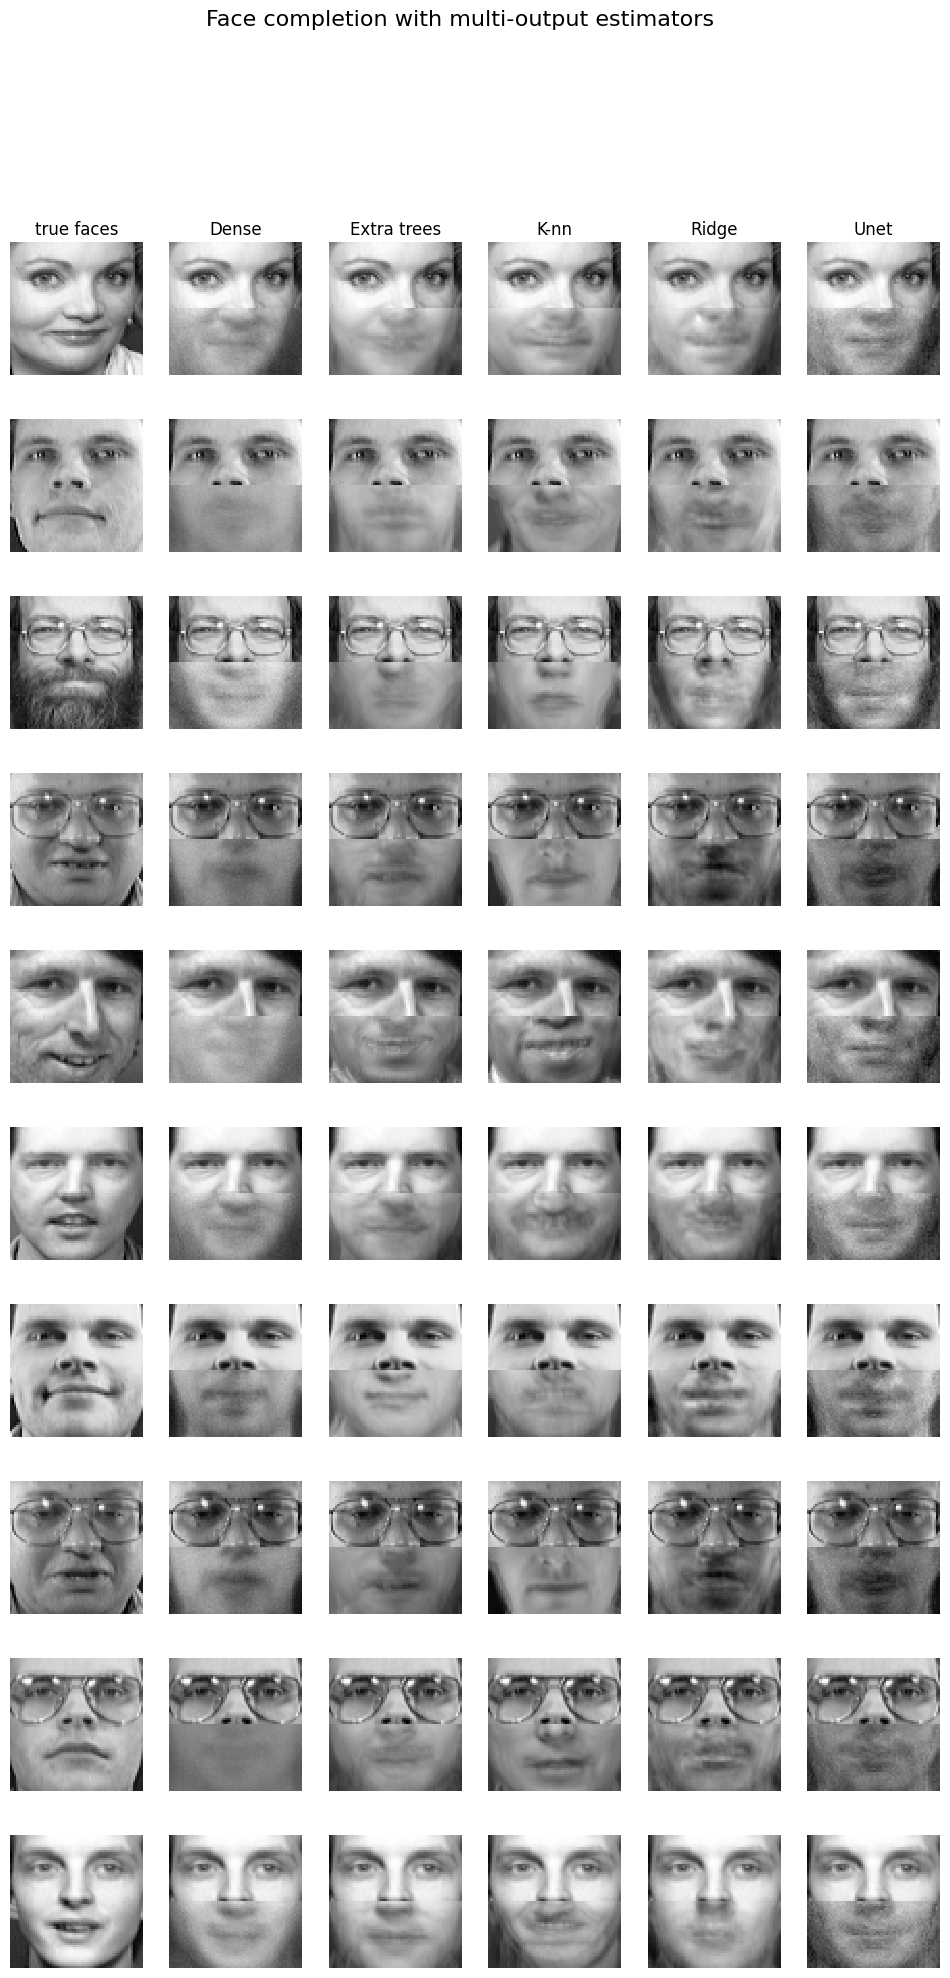

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_random_state

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 10
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Unet": model2,
    "Ridge": RidgeCV(),
    "Dense": model,
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    if name == "Unet":
        estimator.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=16)
        y_test_predict[name] = estimator.predict(X_test)
    elif name == "Dense": 
        estimator.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=16)
        y_test_predict[name] = estimator.predict(X_test)
    else:
        estimator.fit(X_train, y_train)
        y_test_predict[name] = estimator.predict(X_test)


# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

In [11]:
X_train

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.61157024, 0.59917355,
        0.55785125],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.18181819, 0.18181819,
        0.18181819],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.5785124 , 0.58264464,
        0.58677685],
       ...,
       [0.23553719, 0.35123968, 0.446281  , ..., 0.42561984, 0.4214876 ,
        0.42975205],
       [0.42975205, 0.45041323, 0.49586776, ..., 0.48347107, 0.47107437,
        0.3966942 ],
       [0.40495867, 0.45454547, 0.5       , ..., 0.44214877, 0.5206612 ,
        0.5123967 ]], dtype=float32)